# Assignment 1

In [0]:
!unzip data.zip 

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from scipy.stats import gaussian_kde
import seaborn as sns 

job_file = 'Job/JOB.json'   # reference
job = pd.read_json(job_file)

# make job dataframe 
Exec = np.array(job['Land']['Exec']) 
X = np.array(job['Land']['X'])[Exec]
Y = np.array(job['Land']['Y'])[Exec]
ShapeID = np.array(job['Land']['ShapeID'])[Exec] 
PadID = np.array(job['Land']['ID'])[Exec] 

job_data = {'X': X, 'Y': Y, 'ShapeID': ShapeID, 'PadID': PadID}
job_df = pd.DataFrame(data=job_data) 


result_file = 'result.json' # estimated result 

with open(result_file, 'r') as f: 
	data = json.loads(f.read()) 
	pad_data = data['PADINFO'] 
	result_df = pd.DataFrame.from_dict(pad_data, orient='columns') 

result_df = result_df.merge(job_df, on='PadID', how='left') 

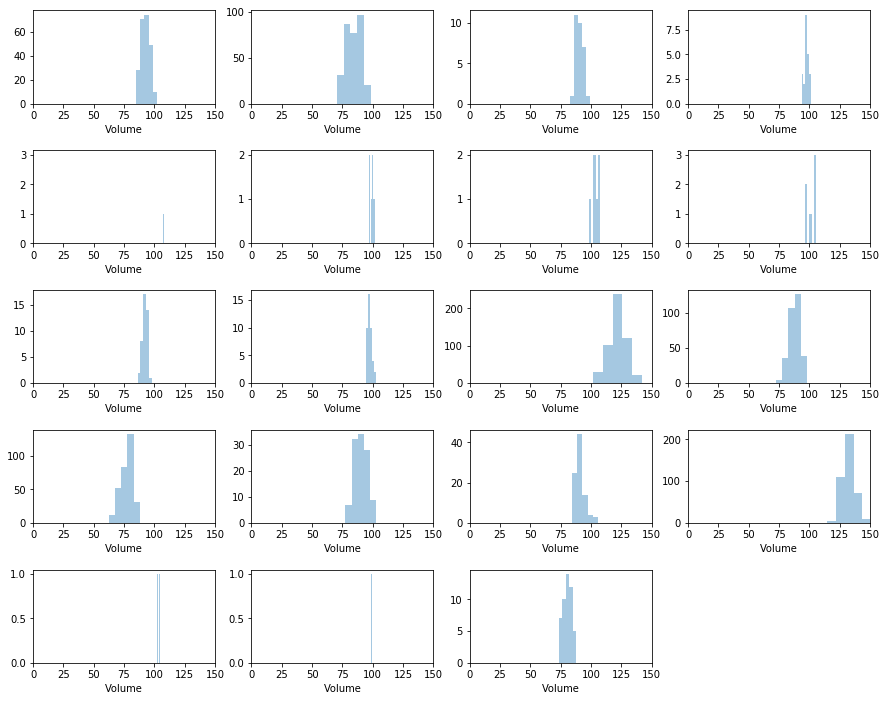

In [0]:
fig1 = plt.figure(figsize=(15,12)) 
fig1.subplots_adjust(hspace=0.5) 

for id in list(set(result_df.ShapeID)):
    ax = plt.subplot(5,4,int(id)) 
    sns.distplot(result_df.Volume[result_df.ShapeID==id], bins=5, hist=True, kde=False)
    ax.set_xlim([0,150]) 


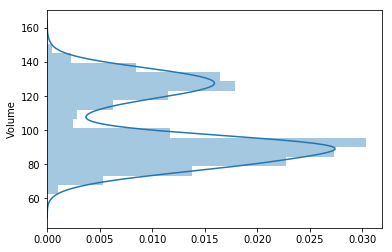

In [0]:
sns.distplot(result_df.Volume, vertical=True) 

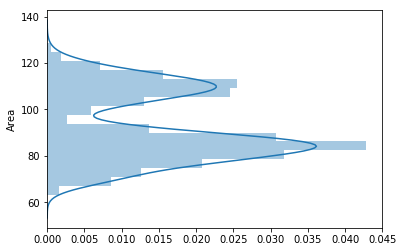

In [0]:
sns.distplot(result_df.Area, vertical=True) 

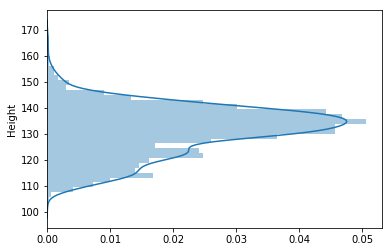

In [0]:
sns.distplot(result_df.Height, vertical=True) 